In [116]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
import math
import matplotlib.pyplot as plt
%matplotlib notebook

## Question (a): 1D interstitial diffusion

Given Table 2.1*, for nitrogen diffusing interstitially in BCC iron, we have

$D_0 = 0.3mm^2s^{-1}, Q = 76.1kJ\ mol^{-1}$

According to equation (2.9)*, at 1000K,

$D = D_0 exp(-\frac{Q}{RT}) = 0.3 * exp(\frac{-76*10^3}{8.314*1000})\ mm^2s^{-1} = 3.215*10^{-5} mm^2s^{-1}$

The analytical solution given in equation (2.23)* for problems with the same boundary conditions will be compared:

$C = C_s - (Cs-C_0)\ erf(\frac{x}{2\sqrt{Dt}})$

*:Porter, D. A., & Easterling, K. E. (1992). Phase transformations in metals and alloys (second edition). Springer-Science+Business Media, B.V.

In [124]:
def interstitial_1D(D=3.215E-5, 
                    Cs=1.0,
                    time=40000,
                   ):
    '''
    Solve the 1D diffusion equation dc/dt = D * d^2c/dx^2 numerically for interstitial diffusion. 
    The boundary conditions (BC) are fixed concentration at the surface and zero flux through the other end.
    Consider thickness up to 10mm, equidistant discritization step = 0.1mm.
    Compared to the analytical (erf) solution.
    
    Parameters
    ----------
    D : Diffusion coefficient, float, unit is mm^2/s. 
        Default to the diffusion coefficient of nitrogen interstitial diffusing into BCC iron at 1000K.
    Cs : Fixed concentration at surface, float, unit is micro-mole/mm^3.
         Default to 1.0, compare: pure Fe got 141 micro-mole/mm^3.
    time : Duration of diffusion, unit is second, step=1s.
           Default to 40000s.
           
    Returns
    -------
    c : Numerical solution of concentration profile evolution [time, depth].
    e : Analytical solution of concentration profile evolution [time, depth].
    '''
    
    init=[1.0]+[0]*101 #initial concentration profile
    c = np.zeros((time+1, len(init)+2)) #evolution of concentration profile, plus 2 out of boundary points to fulfill BC
    c[0] = np.array([2*init[0]-init[1]] + init + [-init[-2]]) #left BC: constant flux; right BC: no flux.
    e = np.zeros((time+1, 101)) #analytical solution
    e[0][0] = Cs; C0 = 0.0 #BC for analytical solution 
    for t in range(1, time+1):
        c[t] = c[t-1] + D * (np.roll(c[t-1], 1) + np.roll(c[t-1], -1) - 2*c[t-1]) * 100 #(left+right-2*middle)/h^2
        c[t][0] = 2*c[t][1]-c[t][2]; c[t][-1] = -c[t][-3] #update BC points
        e[t] = Cs - (Cs - C0) * scipy.special.erf(np.arange(0, 10.1, 0.1)/2.0/math.sqrt(D*t))
    return c[:,1:-2], e #cut BC points and the 'infinity' 0 concentration point off in numerical solution

Plot:

<IPython.core.display.Javascript object>


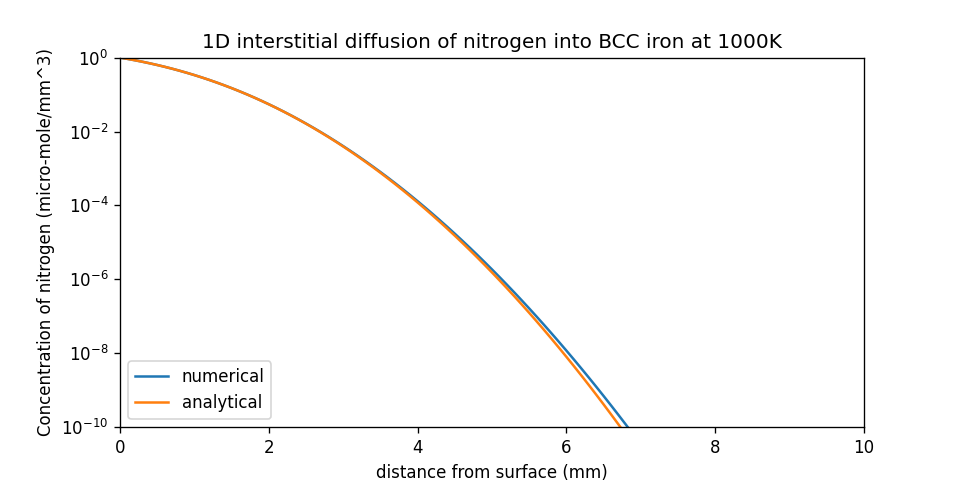

interactive(children=(IntSlider(value=20000, description='t', max=40000), Output()), _dom_classes=('widget-int…

In [125]:
time = 40000
c,e = interstitial_1D(time=time) #get data

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)
x=np.arange(0, 10.1, 0.1)
numerical,  = ax.plot(x,np.zeros_like(x),
                  label='numerical')
analytical, = ax.plot(x,np.zeros_like(x),
                  label='analytical')
plt.xlim([0,10])
plt.ylim([1E-10,1])
plt.yscale('log')
plt.title("1D interstitial diffusion of nitrogen into BCC iron at 1000K")
plt.xlabel("distance from surface (mm)")
plt.ylabel("Concentration of nitrogen (micro-mole/mm^3)")
leg = plt.legend(loc='lower left')

def update(t):
    numerical.set_ydata(c[t])
    analytical.set_ydata(e[t])
    fig.canvas.draw_idle()
    
interact(update, t = (0,time));

Judge from the plot, the numerical and analytical solutions agree pretty well, with slight overestimation of numerical solution approaching the artificial 'infinity 0' boundary.

## Question (b): 2D interdiffusion